# ETF analysis

In [2]:
import yfinance as yf

In [16]:
luxor = yf.download("X010.DE", period="max")
ishares = yf.download("EUNL.DE", period="max")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Text(0.5, 0, 'date')

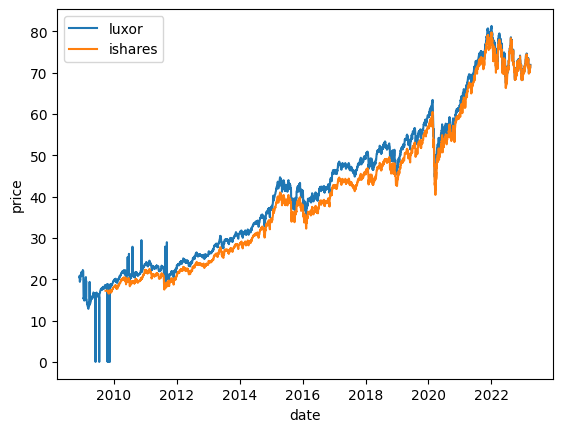

In [17]:
from matplotlib import pyplot as plt

plt.plot(luxor.index, luxor["Open"], label="luxor")
plt.plot(ishares.index, ishares["Open"], label="ishares")
plt.legend()
plt.ylabel("price")
plt.xlabel("date")

Text(0, 0.5, '(Luxor - iShares) / Luxor')

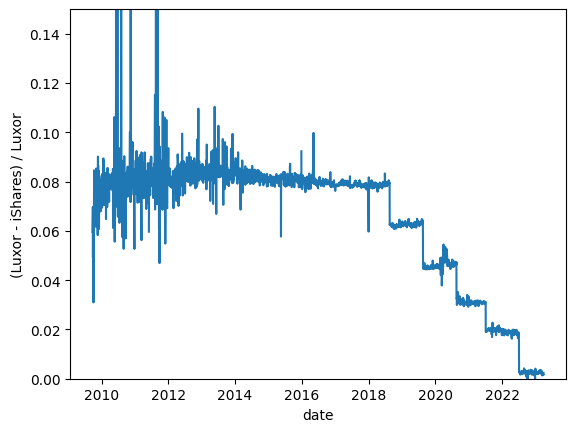

In [26]:
diff = (luxor["Open"] - ishares["Open"]) / luxor["Open"]
plt.plot(diff.index, diff)
plt.ylim(0, 0.15)
plt.xlabel("date")
plt.ylabel("(Luxor - iShares) / Luxor")

## Monthly delta 

In [105]:
from datetime import date, timedelta

start = date(luxor.index[0].year, luxor.index[0].month, 1)
end = date(luxor.index[-1].year, luxor.index[-1].month, 31)
dt = timedelta(days=1)

months = {}

for i, v in zip(luxor.index, luxor["Open"]):
    months.setdefault((i.year, i.month), []).append(
        (i.day, v)
    )

In [106]:
len(months)

173

(-0.1, 0.1)

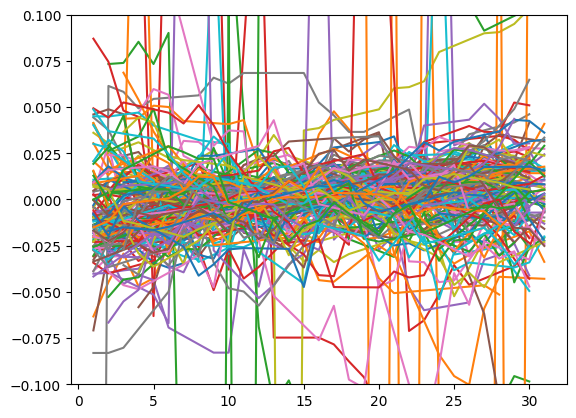

In [111]:
m2 = []
for pairs in months.values():
    days, values = np.transpose(pairs)
    m = np.mean(values)
    m2.append(
        (days, values / m - 1)
    )

for days, vals in m2:
    plt.plot(days, vals)

plt.ylim(-0.1, 0.1)

In [119]:
import numpy as np

data = {}

for days, vals in m2:
    for d, v in zip(days.astype(int), vals):
        data.setdefault(d, []).append(v)

stats = {}
for d, vals in data.items():
    stats[d] = (np.mean(vals), np.std(vals), np.median(vals))

Text(0, 0.5, 'deviation from average price per month')

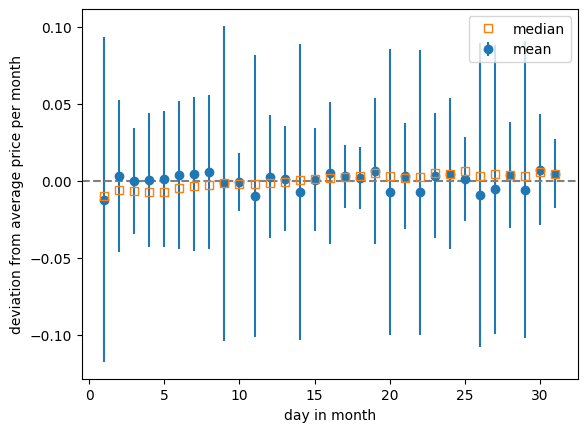

In [126]:
plt.errorbar(stats.keys(), [v[0] for v in stats.values()], [v[1] for v in stats.values()], fmt="o", label="mean")
plt.plot(stats.keys(), [v[2] for v in stats.values()], "s", mfc="none", label="median", zorder=5)
plt.legend()
plt.axhline(0, ls="--", color="0.5")
plt.xlabel("day in month")
plt.ylabel("deviation from average price per month")

In [130]:
luxor_info = yf.Ticker("X010.DE").info
ishares_info = yf.Ticker("EUNL.DE").info

In [138]:
luxor_info["averageDailyVolume10Day"]

57938

In [139]:
ishares_info["averageDailyVolume10Day"]

464867